In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk  #natural language processing toolkit

In [3]:
#Download dataset: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

df = pd.read_csv("/kaggle/input/amazon-fine-food-reviews/Reviews.csv")
print(df.shape)
df.head(2)    

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [4]:
#removing data where score == 3
df = df[df['Score'] != 3]
print(df.shape)
df.head(2)

(525814, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [5]:
#giving a value of 1 to positive reviews(score > 3) and 0 to negative reviews
df['positive_negative'] = 0
df.loc[df['Score']>3, 'positive_negative'] = 1
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,positive_negative
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0


In [6]:
df_grouped = df.groupby('UserId').size().reset_index(name='count')
df_grouped = df_grouped.loc[df_grouped['count']>1]
print(df_grouped.shape)
df_grouped.head()

(75346, 2)


,UserId,count
4,#oc-R115TNMSPFT9I7,2
6,#oc-R11D9D7SHXIJB9,3
7,#oc-R11DNU2NBKQ23Z,2
8,#oc-R11O5J5ZVQE25C,3
10,#oc-R12KPBODL2B5ZD,2


In [7]:
df_grouped['count'].sum()

357746

# **Exploratory Data Analysis**

### Data cleaning: Deduplication

In [8]:
df_sample = df.loc[df['UserId'] == "AR5J8UI46CURR"]
df_sample

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,positive_negative
73790,73791,B000HDOPZG,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...,1
78444,78445,B000HDL1RQ,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...,1
138276,138277,B000HDOPYM,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...,1
138316,138317,B000HDOPYC,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...,1
155048,155049,B000PAQ75C,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...,1


When searched online (www.amazon.com/dp/productId) all the product ids mentioned here represnt the same product with different flavours which are just like the optons avaialbe for a product. Therefore for review we should have only one of them.

In [9]:
#Sorting data according to ProductId in ascending order
sorted_df = df.sort_values('ProductId', ascending = True, axis = 0, inplace = False, kind = 'quicksort', na_position = 'last')
sorted_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,positive_negative
150523,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,5,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,1
150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,4,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",1
150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,4,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,1
150507,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,5,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,1
150508,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,5,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,1
...,...,...,...,...,...,...,...,...,...,...,...
191720,191721,B009UOFTUI,AJVB004EB0MVK,D. Christofferson,0,0,1,1345852800,weak coffee not good for a premium product and...,"This coffee supposedly is premium, it tastes w...",0
1477,1478,B009UOFU20,AJVB004EB0MVK,D. Christofferson,0,0,1,1345852800,weak coffee not good for a premium product and...,"This coffee supposedly is premium, it tastes w...",0
328481,328482,B009UUS05I,ARL20DSHGVM1Y,Jamie,0,0,5,1331856000,Perfect,The basket was the perfect sympathy gift when ...,1
5702,5703,B009WSNWC4,AMP7K1O84DH1T,ESTY,0,0,5,1351209600,DELICIOUS,Purchased this product at a local store in NY ...,1


In [10]:
#Deduplication of entries
final_df = sorted_df.drop_duplicates(subset = {"UserId", "ProfileName", "Time", "Text"}, inplace = False, keep = 'first')
final_df.shape

(364173, 11)

**Observation:-** It was observed that in few rows the value of HelpfulnessNumerator is greater than HelpfulnessDenominator which is not practically possible hence these rows too are removed from calcualtions

In [11]:
final_df=final_df[final_df.HelpfulnessNumerator<=final_df.HelpfulnessDenominator]

In [12]:
#Before starting the next phase of preprocessing lets see the number of entries left
print(final_df.shape)

#How many positive and negative reviews are presnt in our dataset?
final_df['positive_negative'].value_counts()

(364171, 11)


1    307061
0     57110
Name: positive_negative, dtype: int64

Unbalanced dataset. We will deal with it later

# Text Preprocessing

In [13]:
#Printing some random reviews
snt_0 = final_df['Text'].values[0]
print(snt_0)
print('='*50)
snt_100 = final_df['Text'].values[100]
print(snt_100)
print('='*50)
snt_1000 = final_df['Text'].values[1000]
print(snt_1000)
print('='*50)
snt_10000 = final_df['Text'].values[10000]
print(snt_10000)
print('='*50)

this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college
Pros:<br />Dog will do anything for this treat.<br />Doesn't smell as bad as many other treats.<br />Easy to break into smaller pieces.<br />Nothing artificial, easy digestion.<br /><br />Cons:<br />More costly than other dog treats.<br /><br />Overall, this is a great product. While more expensive, my dog will do anything for this treat. He has several phobias, including getting in and out of the car, and walking through doorways, but he ignores all of his fears to get to this treat.
I was really looking forward to these pods based on the reviews.  Starbucks is good, but I prefer bolder taste.... imagine my surprise

In [14]:
#remove urls
import re 

snt_100 = re.sub(r"http\S+", "", snt_100)

print(snt_100)

Pros:<br />Dog will do anything for this treat.<br />Doesn't smell as bad as many other treats.<br />Easy to break into smaller pieces.<br />Nothing artificial, easy digestion.<br /><br />Cons:<br />More costly than other dog treats.<br /><br />Overall, this is a great product. While more expensive, my dog will do anything for this treat. He has several phobias, including getting in and out of the car, and walking through doorways, but he ignores all of his fears to get to this treat.


In [15]:
#remove html tags
from bs4 import BeautifulSoup

soup = BeautifulSoup(snt_100, 'lxml')
text = soup.get_text()
print(text)

Pros:Dog will do anything for this treat.Doesn't smell as bad as many other treats.Easy to break into smaller pieces.Nothing artificial, easy digestion.Cons:More costly than other dog treats.Overall, this is a great product. While more expensive, my dog will do anything for this treat. He has several phobias, including getting in and out of the car, and walking through doorways, but he ignores all of his fears to get to this treat.


In [16]:
def decontracted(phrase):
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [17]:
#remove numbers and alphanumeric words
snt_1000 = re.sub("\S*\d\S*", "", snt_1000)
print(snt_1000)

I was really looking forward to these pods based on the reviews.  Starbucks is good, but I prefer bolder taste.... imagine my surprise when I ordered  boxes - both were expired! One expired back in  for gosh sakes.  I admit that Amazon agreed to credit me for cost plus part of shipping, but geez,  years expired!!!  I'm hoping to find local San Diego area shoppe that carries pods so that I can try something different than starbucks.


In [18]:
#remove special characters
snt_1000 = re.sub('[^A-Za-z0-9]+', " ", snt_1000)
print(snt_1000)

I was really looking forward to these pods based on the reviews Starbucks is good but I prefer bolder taste imagine my surprise when I ordered boxes both were expired One expired back in for gosh sakes I admit that Amazon agreed to credit me for cost plus part of shipping but geez years expired I m hoping to find local San Diego area shoppe that carries pods so that I can try something different than starbucks 


In [19]:
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))
print(len(stopwords))
print(stopwords)

179
{'your', 've', 'at', "doesn't", 'did', 'over', 'nor', 'here', "mightn't", 'theirs', 'doing', 'she', 'further', 'few', 'm', "you're", 'down', 'is', 'needn', 'this', 'our', 'we', 'now', "hadn't", 'yourself', "didn't", 'couldn', "isn't", 'are', 'i', 'which', 'most', "haven't", 'ma', 'him', "needn't", 'above', 's', "wasn't", 'between', 'hasn', 'won', 'both', 'ours', 'for', 'whom', "you've", 'and', 'out', 'my', "weren't", 'aren', 'some', 'if', 'itself', 'but', 'ain', 'can', 'against', 'not', 'too', "won't", 'these', 'isn', 'll', "it's", 'been', 'with', 'because', 'by', 'were', 'until', 'of', "wouldn't", 'then', 'ourselves', 'from', 'those', 'yours', "don't", 'don', 'mustn', 'had', "shan't", 'he', 'same', 'hers', 'off', 'up', 'has', 'myself', 'such', "you'll", 'as', 're', 'it', 'weren', 'himself', 'the', 'why', 'during', 'doesn', 'that', 'once', 'you', 'who', 'was', 'themselves', 'his', 'each', 'own', 'where', 'all', 'than', 'a', 'shan', 'other', 'again', 'below', 'into', 't', "aren't", 

In [20]:
#Removing negative stopwords from stopwords

negative_stopwords = set(word for word in stopwords 
                          if "n't" in word or 'no' in word or "n'" in word)

final_stopwords = stopwords - negative_stopwords
print(len(final_stopwords))
print(final_stopwords)

157
{'your', 've', 'at', 'did', 'over', 'here', 'theirs', 'doing', 'she', 'further', 'few', 'm', "you're", 'down', 'is', 'needn', 'this', 'our', 'we', 'yourself', 'couldn', 'are', 'i', 'which', 'most', 'ma', 'him', 'above', 's', 'between', 'hasn', 'won', 'both', 'ours', 'for', 'whom', "you've", 'and', 'out', 'my', 'aren', 'some', 'if', 'itself', 'but', 'ain', 'can', 'against', 'too', 'these', 'isn', 'll', "it's", 'been', 'with', 'because', 'by', 'were', 'until', 'of', 'then', 'ourselves', 'from', 'those', 'yours', 'don', 'mustn', 'had', 'he', 'same', 'hers', 'off', 'up', 'has', 'myself', 'such', "you'll", 'as', 're', 'it', 'weren', 'himself', 'the', 'why', 'during', 'doesn', 'that', 'once', 'you', 'who', 'was', 'themselves', 'his', 'each', 'own', 'where', 'all', 'than', 'a', 'shan', 'other', 'again', 'below', 'into', 't', 'hadn', 'when', 'in', "that'll", "she's", 'o', 'have', 'an', 'while', 'very', 'y', 'wouldn', 'they', 'its', 'more', 'them', 'under', 'her', 'am', 'does', 'through', '

In [21]:
from tqdm import tqdm
preprocessed_reviews = []
for snt in tqdm(final_df['Text'].values):
    snt = re.sub(r"http\S+", "", snt)
    snt = BeautifulSoup(snt, 'lxml').get_text()
    snt = decontracted(snt)
    snt = re.sub("\S*\d\S*", "", snt)
    snt = re.sub('[^A-Za-z0-9]', " ", snt)
    snt = ' '.join(e.lower() for e in snt.split() if e.lower() not in final_stopwords)
    preprocessed_reviews.append(snt)

  0%|          | 217/364171 [00:00<02:47, 2168.55it/s]/tmp/ipykernel_32/1901402698.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  snt = BeautifulSoup(snt, 'lxml').get_text()
100%|██████████| 364171/364171 [02:59<00:00, 2024.67it/s]


In [22]:
print(len(preprocessed_reviews))
print(final_df.shape)

364171
(364171, 11)


In [23]:
final_df['preprocessed_text'] = preprocessed_reviews
final_df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,positive_negative,preprocessed_text
150523,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,5,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,1,witty little book makes son laugh loud recite ...
150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,4,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",1,grew reading sendak books watching really rosi...


# Converting sentence to vector

## Bag of Words (BOW)

In [24]:
y = final_df['positive_negative']
X = final_df['preprocessed_text']
print(y.value_counts())
X

1    307061
0     57110
Name: positive_negative, dtype: int64


150523    witty little book makes son laugh loud recite ...
150505    grew reading sendak books watching really rosi...
150506    fun way children learn months year learn poems...
150507    great little book read aloud nice rhythm well ...
150508    book poetry months year goes month cute little...
                                ...                        
193173    love love sweetener use baking unsweetened fla...
188388    try sauce believe starts little sweet honey ta...
221794    bought hazelnut paste nocciola spread local sh...
5702      purchased product local store ny kids love qui...
327600    purchased send son away college delivered righ...
Name: preprocessed_text, Length: 364171, dtype: object

In [25]:
X = X.values.reshape(-1, 1)
print(X)

# The code X.values.reshape(-1, 1) is used to reshape a pandas DataFrame or Series object X into a two-dimensional numpy array with a single column.

# Here's what each part of the code does:

# X.values: The .values attribute in pandas returns the underlying numpy array representation of the DataFrame or Series object X.

# .reshape(-1, 1): This is a numpy function that reshapes the array. The first argument -1 indicates that the number of rows should be automatically determined based on the size of the array. 
#  The second argument 1 specifies that the resulting array should have a single column.

#this is done because in the next section we are using RandomUnderSampler function of imblearn module.
#It takes a 2D array as its first argument because generally features have more than one column

[['witty little book makes son laugh loud recite car driving along always sing refrain learned whales india drooping roses love new words book introduces silliness classic book willing bet son still able recite memory college']
 ['grew reading sendak books watching really rosie movie incorporates love son loves however miss hard cover version paperbacks seem kind flimsy takes two hands keep pages open']
 ['fun way children learn months year learn poems throughout school year like handmotions invent poem']
 ...
 ['bought hazelnut paste nocciola spread local shop palm cost florida taste excellent healthier nutella']
 ['purchased product local store ny kids love quick easy meal put toaster oven toast min ready eat strongly recommend']
 ['purchased send son away college delivered right dorm room fast shipping loved much called thank sadly hardly ever calls anymore want kids call home good snack get midterms send']]


In [26]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = undersampler.fit_resample(X, y)
print(y_resampled.value_counts())

0    57110
1    57110
Name: positive_negative, dtype: int64


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.2)
print(x_train.shape, type(x_train))
print(y_train.shape, type(y_train))
y_train.value_counts()

(91376, 1) <class 'numpy.ndarray'>
(91376,) <class 'pandas.core.series.Series'>


0    45743
1    45633
Name: positive_negative, dtype: int64

In [28]:
x_train = pd.Series(np.squeeze(x_train))
print(x_train.shape, type(x_train))

(91376,) <class 'pandas.core.series.Series'>


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

count_vect.fit(x_train)
print("some feature names:", count_vect.get_feature_names_out()[:10])

some feature names: ['aa' 'aaa' 'aaaaa' 'aaaaaa' 'aaaaaaaaaaa' 'aaaaaah' 'aaaaaahhhhh'
 'aaaaaahhhhhyaaaaaa' 'aaaaahhhhhhhhhhhhhhhh' 'aaaah']


In [30]:
final_counts = count_vect.transform(x_train)
print("Data type of final_counts:",type(final_counts))
print(final_counts.shape)
print("No. of unique words: ",final_counts.shape[1])

Data type of final_counts: <class 'scipy.sparse._csr.csr_matrix'>
(91376, 58983)
No. of unique words:  58983


In [31]:
positive = []
for text, label in zip(x_train, y_train):
    if label == 1:
        positive.append(text)
        
        
negative = []
for text, label in zip(x_train, y_train):
    if label == 0:
        negative.append(text)

In [32]:
print(len(positive))
print(len(negative))

45633
45743


In [33]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [34]:
from wordcloud import WordCloud
def generate_wcloud(text):
    wordcloud = WordCloud(background_color='white')
    wordcloud.generate(text)
    plt.figure(figsize=(15,7))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    return plt.show()

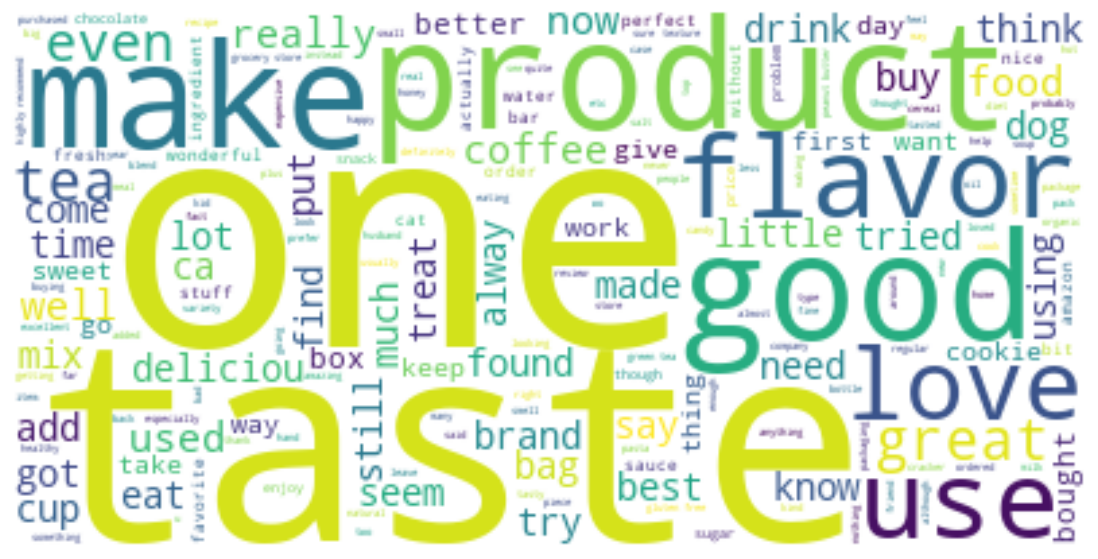

In [35]:
generate_wcloud(str(positive))

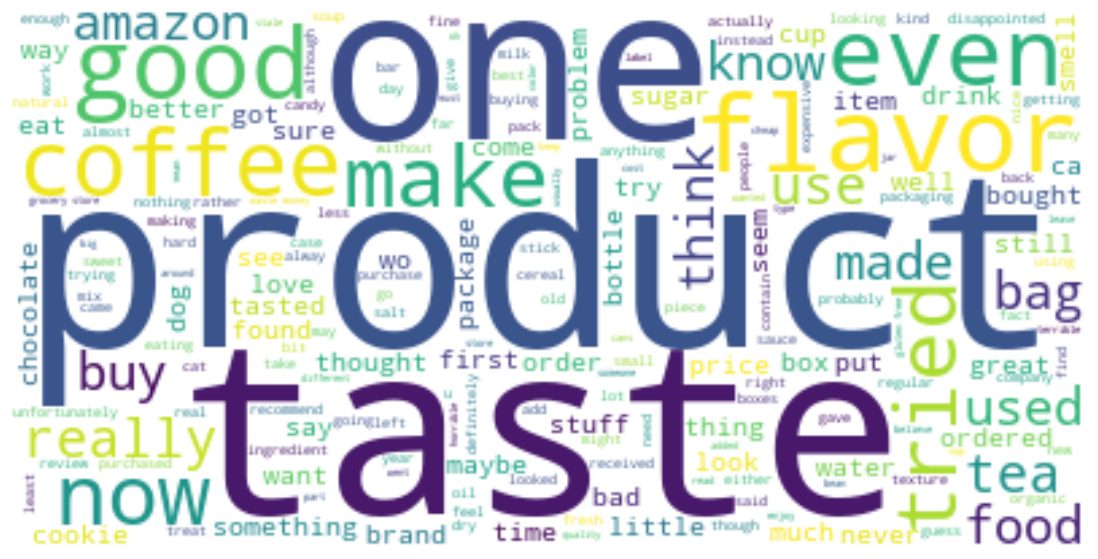

In [36]:
generate_wcloud(str(negative))

In [37]:
# count_vect = CountVectorizer(ngram_range=(1,2))
# final_bigram_counts = count_vect.fit_transform(final_df['preprocessed_text'])
# print("the type of count vectorizer ",type(final_bigram_counts))
# print("the shape of out text BOW vectorizer ",final_bigram_counts.get_shape())
# print("the number of unique words including both unigrams and bigrams ", final_bigram_counts.get_shape()[1])

## TF-IDF

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vect = TfidfVectorizer(ngram_range = (1,2))
final_tf_idf = tf_idf_vect.fit_transform(x_train)
print(final_tf_idf.shape)

(91376, 1535351)


In [39]:
#print(tf_idf_vect.get_feature_names())
print("some feature names:", list(tf_idf_vect.vocabulary_.keys())[:10])
print("length of feature list: ",len(tf_idf_vect.vocabulary_.keys()))
type(final_tf_idf)

some feature names: ['wife', 'agreed', 'water', 'artificial', 'taste', 'not', 'bad', 'aftertaste', 'pros', 'electrolytes']
length of feature list:  1535351


scipy.sparse._csr.csr_matrix

## Word 2 Vec

In [40]:
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sentance=[]
for sentance in x_train:
    list_of_sentance.append(sentance.split())

In [41]:
from gensim.models import Word2Vec

# min_count = 5 considers only words that occured atleast 5 times
w2v_model=Word2Vec(list_of_sentance,min_count=5, vector_size = 50, workers=4)
print(w2v_model.wv.most_similar('great'))
print('='*50)
print(w2v_model.wv.most_similar('worst'))

[('awesome', 0.8572980761528015), ('good', 0.8430885672569275), ('terrific', 0.8349297046661377), ('fantastic', 0.8330677151679993), ('amazing', 0.8065677881240845), ('wonderful', 0.8042197227478027), ('excellent', 0.8041783571243286), ('perfect', 0.7874106764793396), ('fabulous', 0.6930021047592163), ('nice', 0.6806551218032837)]
[('nastiest', 0.8683180212974548), ('greatest', 0.8044428825378418), ('best', 0.7114098072052002), ('tastiest', 0.6886630654335022), ('grossest', 0.6761788129806519), ('weakest', 0.6752195358276367), ('horrid', 0.6595826148986816), ('disgusting', 0.6447812914848328), ('saltiest', 0.6418066620826721), ('vile', 0.6390302777290344)]


In [42]:
w2v_words = list(w2v_model.wv.key_to_index.keys())
print("Number of words that occurred minimum 5 times:", len(w2v_words))
print("Sample words:", w2v_words[:50])

Number of words that occurred minimum 5 times: 18594
Sample words: ['not', 'like', 'taste', 'product', 'would', 'one', 'good', 'flavor', 'coffee', 'great', 'no', 'tea', 'get', 'food', 'love', 'amazon', 'really', 'much', 'even', 'buy', 'time', 'also', 'use', 'tried', 'price', 'make', 'little', 'could', 'try', 'better', 'now', 'well', 'find', 'first', 'chocolate', 'box', 'eat', 'bought', 'sugar', 'water', 'best', 'made', 'used', 'bag', 'dog', 'way', 'found', 'order', 'two', 'tastes']


## Logistic regression

### Logistic regression with BOW

In [43]:
#Logistic regression with GridsearchCV with BOW
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'penalty' : ['l2'], 
    'C'       : [0.001, 0.01, 0.1, 1, 10],
    'solver'  : [ 'lbfgs'],
}

logreg = LogisticRegression()
lr_bow = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

In [44]:
lr_bow.fit(final_counts, y_train)
print("Tuned Hyperparameters :", lr_bow.best_params_)
print("Training accuracy :",lr_bow.best_score_)

Tuned Hyperparameters : {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Training accuracy : 0.8882201546541613


In [45]:
x_test = pd.Series(np.squeeze(x_test))
print(x_test.shape, type(x_test))

(22844,) <class 'pandas.core.series.Series'>


In [46]:
x_test_bow = count_vect.transform(x_test)

In [47]:
y_pred_bow = lr_bow.predict(x_test_bow)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_bow))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     11367
           1       0.89      0.89      0.89     11477

    accuracy                           0.89     22844
   macro avg       0.89      0.89      0.89     22844
weighted avg       0.89      0.89      0.89     22844



In [48]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_bow)
print("Accuracy: ", accuracy)

Accuracy:  0.8905620731920855


In [49]:
y_test.value_counts()

1    11477
0    11367
Name: positive_negative, dtype: int64

In [50]:
pd.Series(y_pred_bow).value_counts()

1    11483
0    11361
dtype: int64

In [51]:
print(type(final_df['positive_negative']))
print(type(y_test))
print(type(y_pred_bow))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


### Logistic regression with TF-IDF

In [52]:
#Logistic regression with GridsearchCV with TF-IDF
#Using the same logreg defined earlier for BOW

# parameter grid
parameters = {
    'penalty' : ['l2'], 
    'C'       : [0.001, 0.01, 0.1, 1, 10],
    'solver'  : [ 'lbfgs'],
}

lr_tf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

lr_tf.fit(final_tf_idf, y_train)
print("Tuned Hyperparameters :", lr_tf.best_params_)
print("Training accuracy :",lr_tf.best_score_)

Tuned Hyperparameters : {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Training accuracy : 0.9099654781990913


In [53]:
x_test_tf = tf_idf_vect.transform(x_test)
y_pred_tf = lr_tf.predict(x_test_tf)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tf))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     11367
           1       0.91      0.91      0.91     11477

    accuracy                           0.91     22844
   macro avg       0.91      0.91      0.91     22844
weighted avg       0.91      0.91      0.91     22844



In [54]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_tf))

0.9114428296270356


### Logistic regression with W2V

In [55]:
def get_sentence_vector(sentence):
    vector_sum = np.zeros(w2v_model.vector_size)
    for word in sentence:
        if word in w2v_model.wv.key_to_index:
            vector_sum += w2v_model.wv[word]
    if len(sentence) > 0:
        return vector_sum / len(sentence)
    else:
        return vector_sum

In [56]:
x_train_WV = np.array([get_sentence_vector(sentence) for sentence in x_train])
x_test_WV = np.array([get_sentence_vector(sentence) for sentence in x_test])

In [57]:
#Logistic regression with GridsearchCV with W2V
#Using the same logreg defined earlier for BOW

# parameter grid
parameters_WV = {
    'penalty' : ['l2'], 
    'C'       : [0.001, 0.01, 0.1, 1, 10],
    'solver'  : [ 'lbfgs'],
}

lr_WV = GridSearchCV(logreg,                     # model
                   param_grid = parameters_WV,   # hyperparameters
                   scoring='accuracy',           # metric for scoring
                   cv=10)                        # number of folds

In [58]:
lr_WV.fit(x_train_WV, y_train)
print("Tuned Hyperparameters :", lr_WV.best_params_)
print("Training accuracy :",lr_WV.best_score_)

Tuned Hyperparameters : {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Training accuracy : 0.6101492604741716


In [59]:
y_pred_WV = lr_WV.predict(x_test_WV)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_WV))

              precision    recall  f1-score   support

           0       0.61      0.62      0.61     11367
           1       0.61      0.60      0.61     11477

    accuracy                           0.61     22844
   macro avg       0.61      0.61      0.61     22844
weighted avg       0.61      0.61      0.61     22844



In [60]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_WV))

0.6090877254421292


## Naive Bayes

### Naive Bayes on BOW

In [61]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(final_counts, y_train)

MultinomialNB()

In [62]:
y_pred_bow_NB = model.predict(x_test_bow)

print(classification_report(y_test, y_pred_bow_NB))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     11367
           1       0.86      0.88      0.87     11477

    accuracy                           0.87     22844
   macro avg       0.87      0.87      0.87     22844
weighted avg       0.87      0.87      0.87     22844



In [63]:
accuracy = accuracy_score(y_test, y_pred_bow_NB)
print("Accuracy: ", accuracy)

Accuracy:  0.867755209245316


### Naive Bayes on TF-IDF

In [64]:
model.fit(final_tf_idf, y_train)

y_pred_tf_NB = model.predict(x_test_tf)

print(classification_report(y_test, y_pred_bow_NB))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     11367
           1       0.86      0.88      0.87     11477

    accuracy                           0.87     22844
   macro avg       0.87      0.87      0.87     22844
weighted avg       0.87      0.87      0.87     22844



In [65]:
accuracy = accuracy_score(y_test, y_pred_tf_NB)
print("Accuracy: ", accuracy)

Accuracy:  0.9001488355804588


### Naive Bayes on W2V

Multinomial Naive Bayes is typically used for discrete data, such as word counts or frequencies. However, Word2Vec embeddings are dense vectors that can contain negative values, which makes them unsuitable for MultinomialNB.

## Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

### RF on BOW

In [67]:
rf.fit(final_counts, y_train)

RandomForestClassifier(random_state=42)

In [68]:
y_pred_bow_rf = rf.predict(x_test_bow)
accuracy = accuracy_score(y_test, y_pred_bow_rf)
print("Accuracy:", accuracy)

Accuracy: 0.8692873402206268


### RF on TF-IDF

In [ ]:
rf.fit(final_tf_idf, y_train)

In [70]:
y_pred_tf_rf = rf.predict(x_test_tf)
accuracy = accuracy_score(y_test, y_pred_tf_rf)
print("Accuracy:", accuracy)

Accuracy: 0.8799247067063561


### RF on Word2Vec

In [71]:
rf.fit(x_train_WV, y_train)

RandomForestClassifier(random_state=42)

In [72]:
y_pred_WV_rf = rf.predict(x_test_WV)
accuracy = accuracy_score(y_test, y_pred_WV_rf)
print("Accuracy:", accuracy)

Accuracy: 0.5890824724216425
